In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = (12,5)

In [3]:
df = pd.read_csv('Data/macrodata.csv',index_col=0,parse_dates=True)
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


<Axes: >

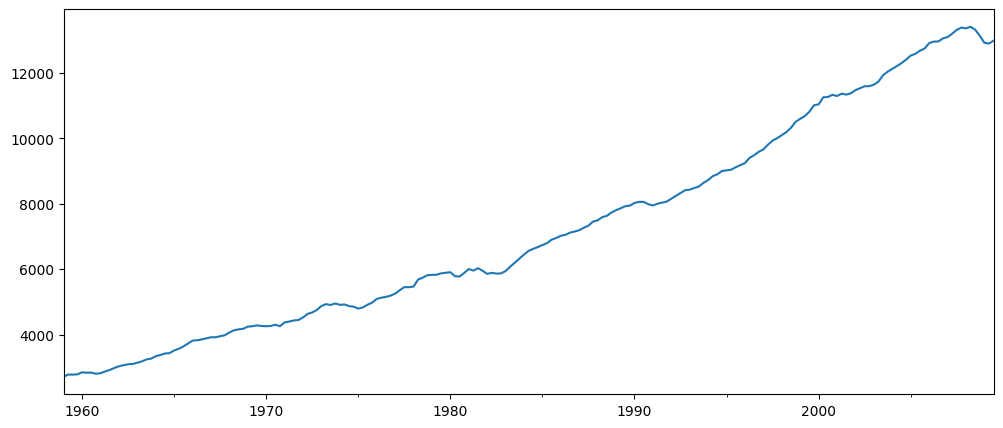

In [4]:
df['realgdp'].plot()

In [5]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'],lamb=1600) #quarter data

In [6]:
type(gdp_trend)

pandas.core.series.Series

<Axes: >

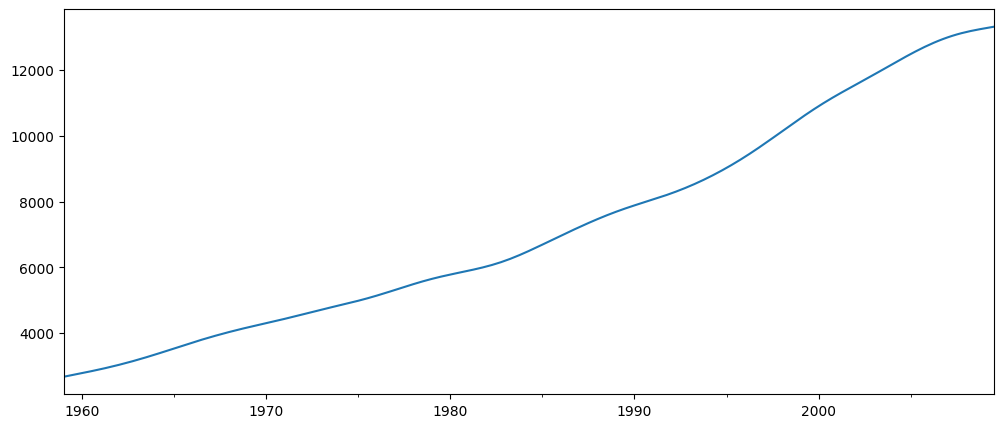

In [7]:
gdp_trend.plot()

In [8]:
df['trend'] = gdp_trend

<Axes: >

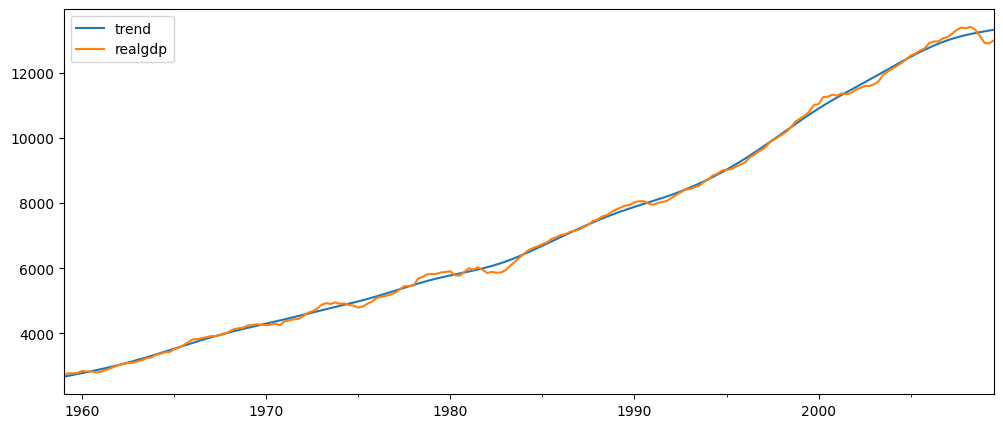

In [9]:
df[['trend','realgdp']].plot(figsize=(12,5))

<Axes: >

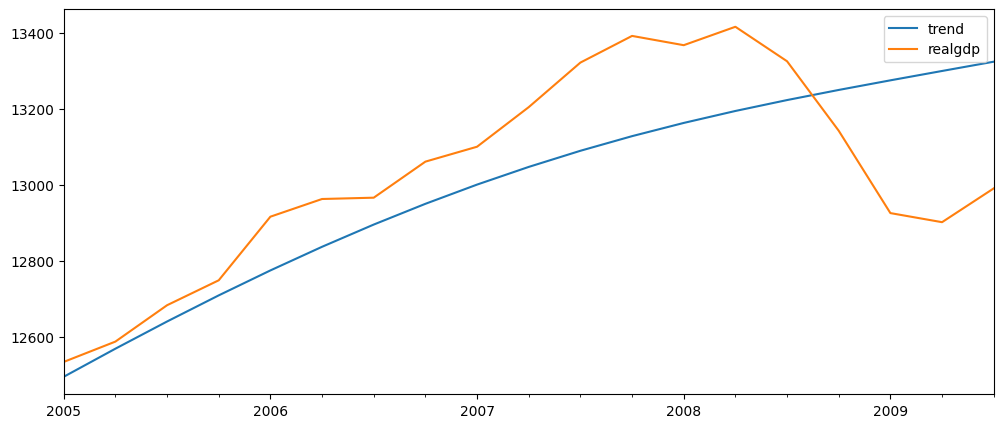

In [10]:
df[['trend','realgdp']]['2005-01-01':].plot(figsize=(12,5))

## ETS

In [11]:
airline = pd.read_csv('Data/airline_passengers.csv',index_col='Month',parse_dates=True)
airline

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Axes: xlabel='Month'>

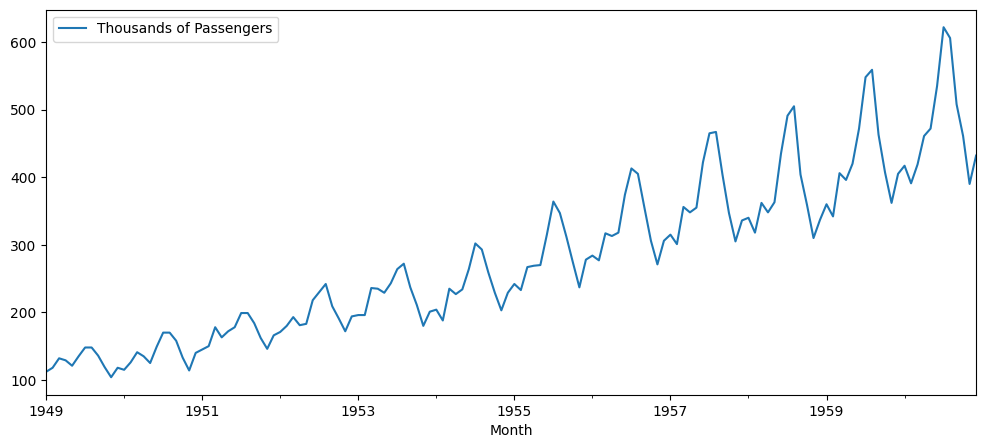

In [12]:
airline = airline.dropna()
airline.plot()

In [13]:
result = seasonal_decompose(airline['Thousands of Passengers'],model='multiplicative')

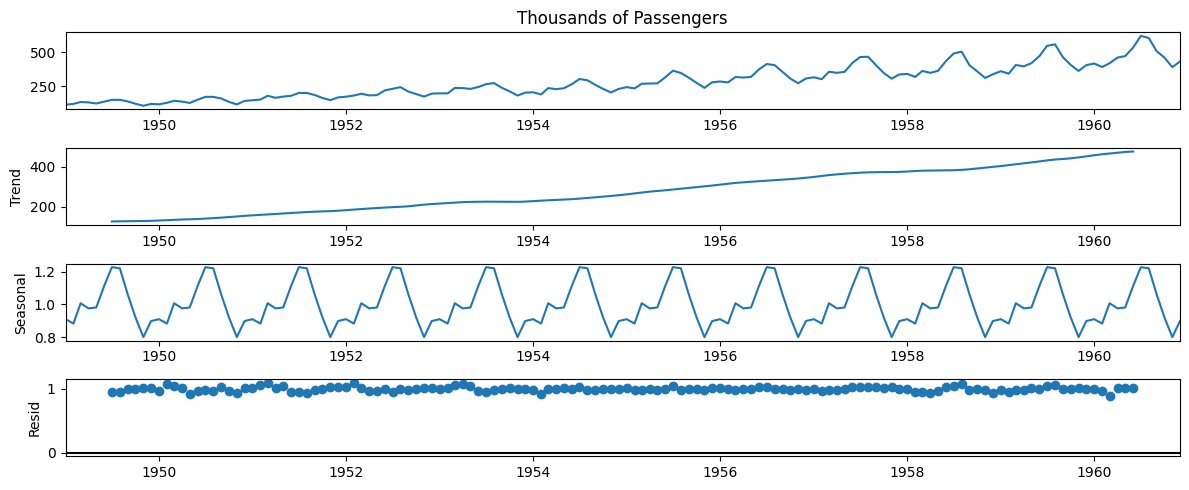

In [14]:
result.plot(); # make sure have ';'

## EWMA

In [15]:
airline = pd.read_csv('Data/airline_passengers.csv',index_col='Month',parse_dates=True)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [16]:
airline.dropna(inplace=True)

In [17]:
airline.index = pd.to_datetime(airline.index)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [18]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

<Axes: xlabel='Month'>

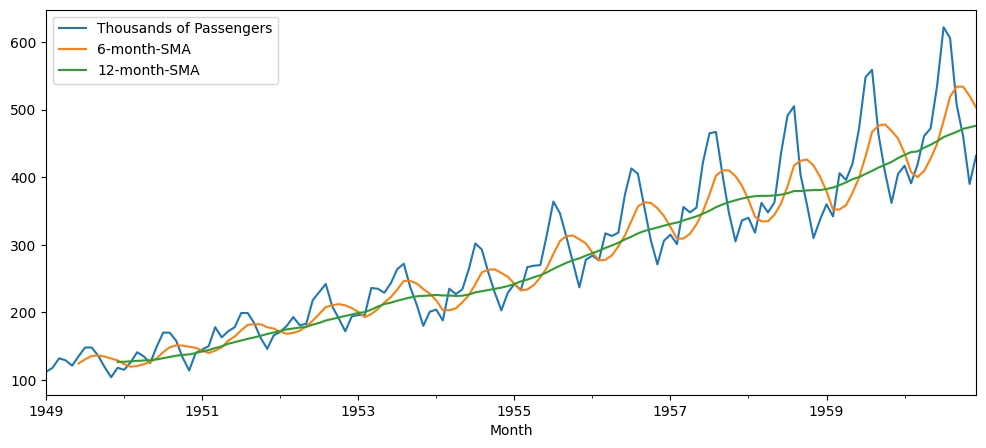

In [19]:
airline.plot()

<Axes: xlabel='Month'>

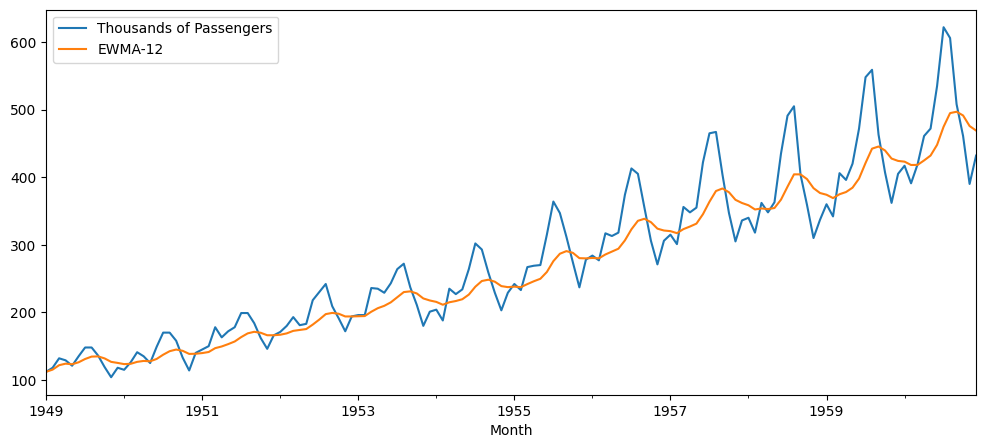

In [20]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()
airline[['Thousands of Passengers', 'EWMA-12']].plot()

## Holt - Winters

In [26]:
df = pd.read_csv('Data/airline_passengers.csv', index_col='Month', parse_dates=True)
df = df.dropna()
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [27]:
df.index.freq = 'MS'
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [38]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

In [29]:
span = 12
alpha = 2 / (span + 1)

In [32]:
df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()
df.head()

,Thousands of Passengers,EWMA12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


In [37]:
model = SimpleExpSmoothing(df['Thousands of Passengers'])
fitted_model = model.fit(smoothing_level=alpha,optimized=False)
df['SES12'] = fitted_model.fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


<Axes: xlabel='Month'>

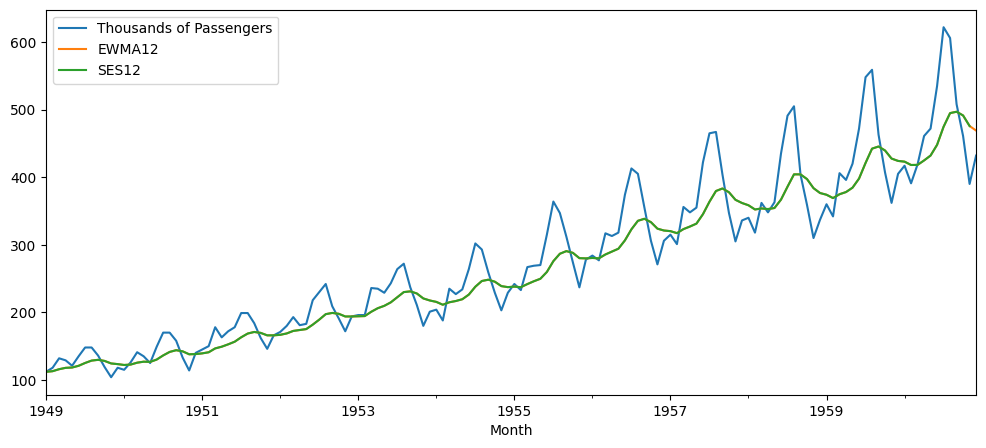

In [39]:
df.plot()

In [40]:
df['DES_add_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='add').fit().fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,EWMA12,SES12,DES_add_12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.102394
1949-02-01,118,112.923077,112.923077,120.040657
1949-03-01,132,115.857988,115.857988,134.001539
1949-04-01,129,117.879836,117.879836,131.085845
1949-05-01,121,118.359861,118.359861,123.110263


<Axes: xlabel='Month'>

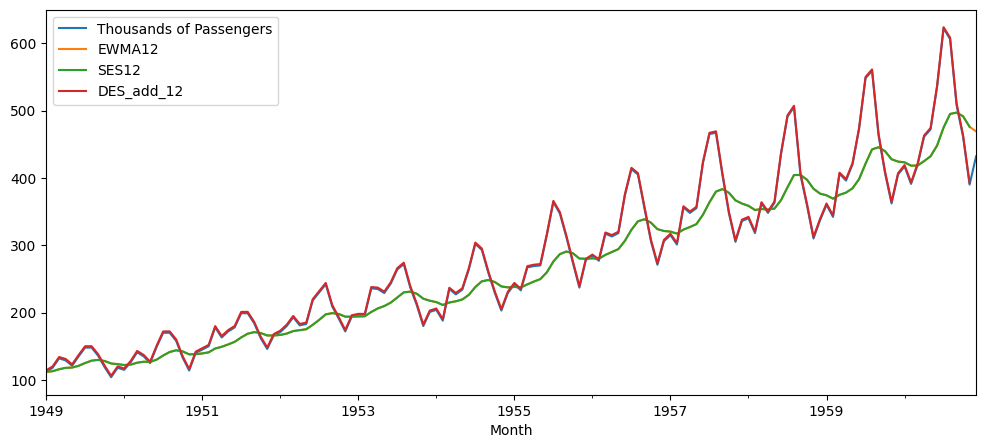

In [41]:
df.plot()

<Axes: xlabel='Month'>

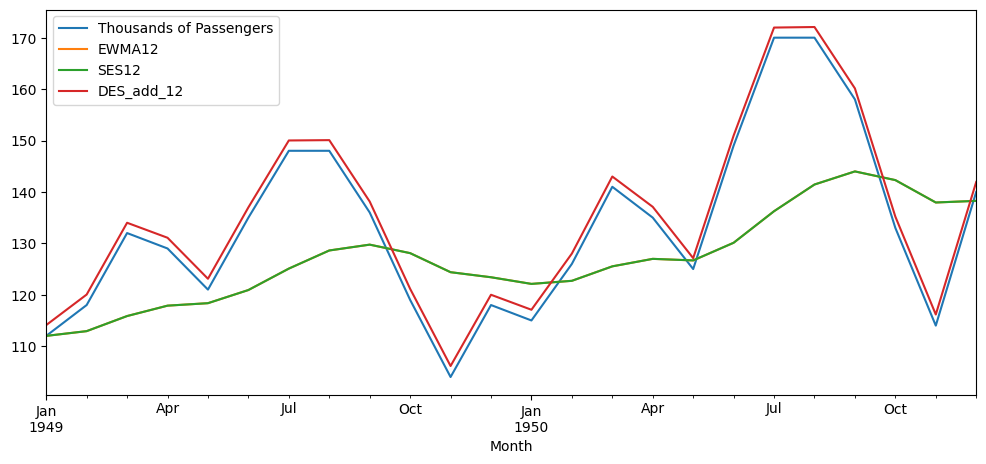

In [42]:
df.iloc[:24].plot()

In [43]:
df['DES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul').fit().fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,EWMA12,SES12,DES_add_12,DES_mul_12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.102394,113.990701
1949-02-01,118,112.923077,112.923077,120.040657,120.031669
1949-03-01,132,115.857988,115.857988,134.001539,134.235979
1949-04-01,129,117.879836,117.879836,131.085845,131.270786
1949-05-01,121,118.359861,118.359861,123.110263,123.156267


<Axes: xlabel='Month'>

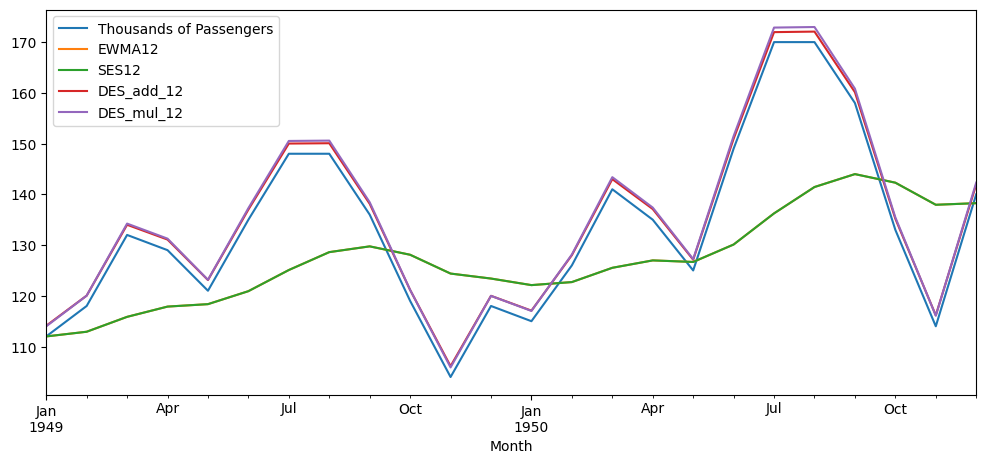

In [44]:
df.iloc[:24].plot()

In [50]:
df['TES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df.head()

c:\Users\cuong\workspace\github\Learning\tsa_course\env\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


,Thousands of Passengers,EWMA12,SES12,DES_add_12,DES_mul_12,TES_mul_12
Month,,,,,,
1949-01-01,112,112.000000,112.000000,114.102394,113.990701,111.595648
1949-02-01,118,112.923077,112.923077,120.040657,120.031669,118.842606
1949-03-01,132,115.857988,115.857988,134.001539,134.235979,133.333853
1949-04-01,129,117.879836,117.879836,131.085845,131.270786,127.899963
1949-05-01,121,118.359861,118.359861,123.110263,123.156267,120.979016


In [48]:
df.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'DES_add_12',
       'DES_mul_12', 'TES_mul_12'],
      dtype='object')

<Axes: xlabel='Month'>

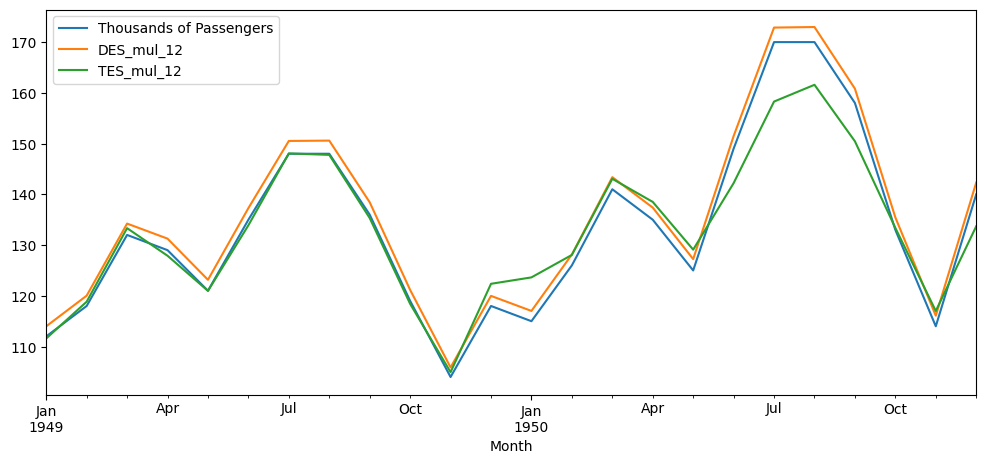

In [51]:
df[['Thousands of Passengers','DES_mul_12', 'TES_mul_12']].iloc[:24].plot()